In [1]:




# anomaly reprrsnet unique...or oulayerss which will defer from normall data.....
# ipl over-1-12,2-15,3-10,4-60---- so using algorhtns we can able to detct it is analmalyyy
# finanti; secter


# Anomaly detection involves identifying data points or patterns that deviate significantly from the norm.
# These anomalies can indicate critical incidents such as fraud, system failures, or security breaches.






# Supervised Learning:

# Description: Requires labeled datasets with both normal and anomalous instances.

# Examples: Logistic Regression, Decision Trees.




# Algorithm	Type	How it works
# Z-Score	Statistical	Flags data points far from mean
# Isolation Forest	Unsupervised	Randomly isolates anomalies using decision trees
# One-Class SVM	Semi-supervised	Learns a boundary around normal data
# DBSCAN	Unsupervised	Detects clusters; outliers are points not in any cluster
# Autoencoder	Deep Learning	Learns to reconstruct input; large errors = anomalies





#  Why It Works for Anomaly Detection
# Autoencoders learn to reconstruct normal data very well.

# When the model sees anomalous data, it struggles to reconstruct it, resulting in high reconstruction error.

# You use the reconstruction error as an anomaly score.


# Train the autoencoder only on normal data.

# Calculate reconstruction error on new data.

# If error > threshold → mark as anomaly.






# Anomaly detection

Anomaly Detection in Machine Learning is the process of identifying unusual patterns, data points, or events that do not conform to expected behavior within a dataset. These "anomalies" can indicate critical incidents like fraud, network intrusions, equipment failures, or data quality issues.

 1. Supervised Anomaly Detection (requires labeled data)

Examples: Classification algorithms like Random Forest, XGBoost

Labels: normal vs anomaly

Rare in real-world due to lack of anomaly labels

2. Unsupervised Anomaly Detection

No labels needed; the algorithm finds anomalies by learning patterns from normal data

Examples:

Isolation Forest

One-Class SVM

K-Means (distance-based)

Autoencoders (deep learning)

#  Isolation Forest

Isolation Forest (iForest) is an unsupervised anomaly detection algorithm. It isolates anomalies instead of profiling normal data. The main idea is:

Anomalies are rare and different, so they can be isolated faster than normal points.

eg.. Imagine you have a room full of people who look and act normal, but one person is wearing a space suit. That space suit person is easy to spot and isolate. That’s how Isolation Forest works — it tries to find the "odd ones out".

The algorithm randomly splits the data again and again. If a data point is very different (an anomaly), it will get separated very quickly in fewer steps.

Pick random data points and create random decision trees.

Each tree splits the data randomly based on feature values.

Keep splitting until each point is separated from the rest.

Count how many splits it took to isolate each point.

Few splits = probably an anomaly

Many splits = probably normal



Every point gets a score.

Score is based on how fast it got isolated in the trees.

Score is between 0 and 1:

Close to 1 = anomaly

Close to 0 = normal





it is using eqaution to calculate score:



s(x,n)=2^-e(h(x))/c(n)

E(h(x)) = average path length to isolate x

c(n) = average path length of n samples


Score ranges from 0 to 1

Close to 1 → anomaly

Close to 0.5 → normal




In [2]:
# apply code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Create 2D dataset (normal + anomalies)
np.random.seed(42)

# Normal data (clustered around center)
X_normal = 0.3 * np.random.randn(100, 2)
X_normal += [2, 2]

# Anomalous data (far away points)
X_anomalies = np.random.uniform(low=-4, high=4, size=(10, 2))

# Combine them
X = np.vstack((X_normal, X_anomalies))



In [5]:
X

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

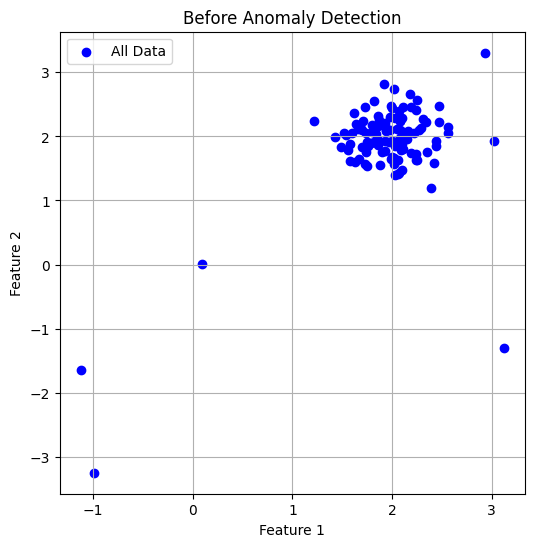

In [6]:
# Step 2: Visualize original data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='All Data')
plt.title("Before Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()



In [7]:
# Step 3: Train Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

# Step 4: Predict (1 = normal, -1 = anomaly)
preds = model.predict(X)

preds

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1])

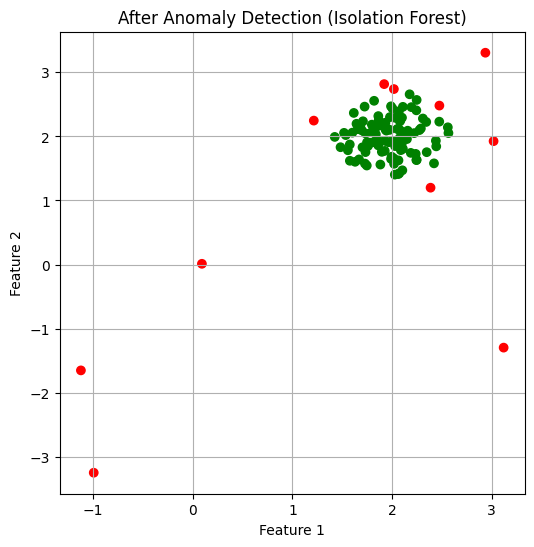

In [ ]:
# Step 5: Visualize after anomaly detection
colors = np.where(preds == 1, 'green', 'red')  # Green = normal, Red = anomaly

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("After Anomaly Detection (Isolation Forest)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()






#  DBSCAN (Density-Based Spatial Clustering of Applications with Noise

DBSCAN is a clustering algorithm that groups together points that are close to each other and marks points in low-density regions as outliers.


How It Works
DBSCAN uses two parameters:

eps: The maximum distance between two points to be considered neighbors.

min_samples: The minimum number of neighboring points required to form a dense region (cluster).

Each point in the dataset is categorized as:

Core point: Has at least min_samples within eps.

Border point: Fewer than min_samples within eps, but in the neighborhood of a core point.

Noise point (outlier): Neither a core point nor a border point.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Step 1: Create 3 circular clusters
def generate_circle(center, radius, n_points):
    theta = np.linspace(0, 2*np.pi, n_points)
    r_noise = radius + 0.05 * np.random.randn(n_points)
    x = center[0] + r_noise * np.cos(theta)
    y = center[1] + r_noise * np.sin(theta)
    return np.c_[x, y]

cluster1 = generate_circle(center=[0, 0], radius=1, n_points=100)
cluster2 = generate_circle(center=[4, 0], radius=1, n_points=100)
cluster3 = generate_circle(center=[2, 3.5], radius=1, n_points=100)

# Step 2: Add outliers
outliers = np.random.uniform(low=-2, high=6, size=(20, 2))

# Combine all data
X = np.vstack([cluster1, cluster2, cluster3, outliers])


X



array([[ 1.00979226e+00,  0.00000000e+00],
       [ 9.49166527e-01,  6.03213078e-02],
       [ 1.01220323e+00,  1.29176539e-01],
       [ 8.98337912e-01,  1.73140441e-01],
       [ 1.01775719e+00,  2.64071506e-01],
       [ 9.72521179e-01,  3.19406757e-01],
       [ 9.40252423e-01,  3.76420288e-01],
       [ 9.47291427e-01,  4.50912691e-01],
       [ 9.46618067e-01,  5.26684148e-01],
       [ 8.83920653e-01,  5.68061311e-01],
       [ 7.31150194e-01,  5.38334483e-01],
       [ 7.17033802e-01,  6.01662799e-01],
       [ 7.01123914e-01,  6.68520302e-01],
       [ 6.79394563e-01,  7.35550022e-01],
       [ 6.46873231e-01,  7.96235425e-01],
       [ 5.59008274e-01,  7.85017279e-01],
       [ 5.32148877e-01,  8.57660453e-01],
       [ 4.54433799e-01,  8.48161622e-01],
       [ 4.02713329e-01,  8.81819187e-01],
       [ 3.31785323e-01,  8.68446388e-01],
       [ 2.83214037e-01,  9.10822367e-01],
       [ 2.19825349e-01,  9.06132432e-01],
       [ 1.65175247e-01,  9.36755376e-01],
       [ 1.

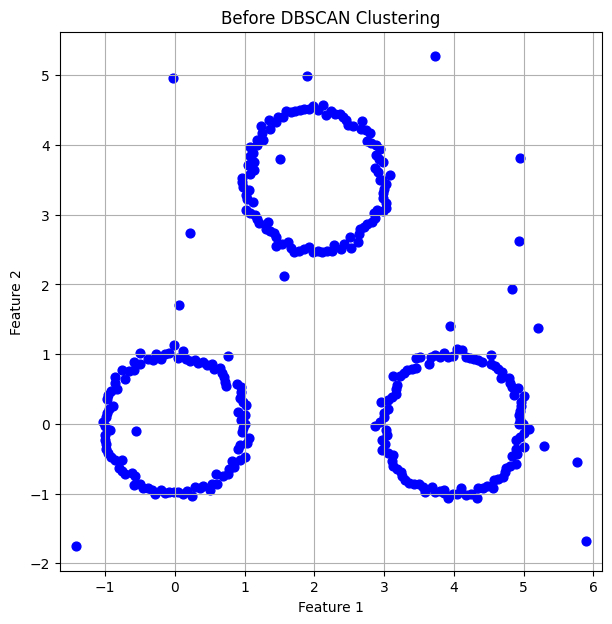

In [14]:
# Step 3: Plot data before DBSCAN
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=40)
plt.title("Before DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.axis('equal')
plt.show()



In [15]:
# Step 4: Apply DBSCAN
model = DBSCAN(eps=0.3, min_samples=5)
labels = model.fit_predict(X)

labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

C:\Users\USER\AppData\Local\Temp\ipykernel_1704\4269460412.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[mask, 0], X[mask, 1], c=color, label=f'{"Outlier" if label == -1 else f"Cluster {label}"}', s=60, edgecolor='k')


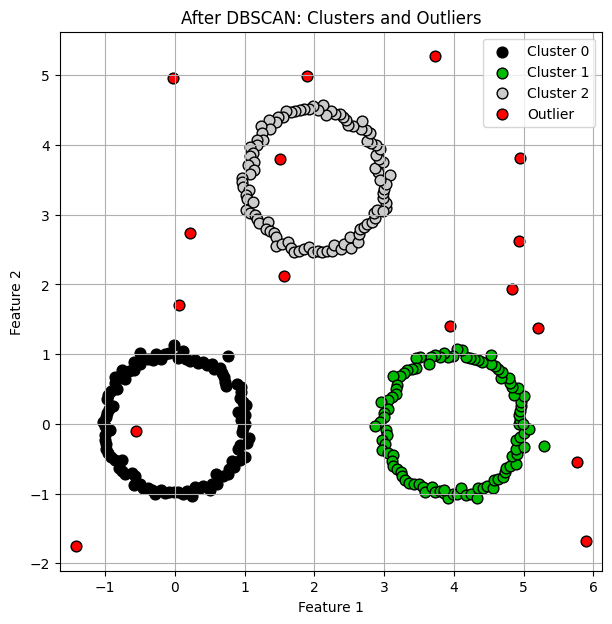

In [16]:
# Step 5: Plot data after clustering
plt.figure(figsize=(7, 7))
unique_labels = set(labels)

for label in unique_labels:
    mask = labels == label
    color = 'red' if label == -1 else plt.cm.nipy_spectral(float(label) / max(unique_labels))
    plt.scatter(X[mask, 0], X[mask, 1], c=color, label=f'{"Outlier" if label == -1 else f"Cluster {label}"}', s=60, edgecolor='k')

plt.title("After DBSCAN: Clusters and Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


# Local Outlier Factor (LOF)

LOF is an anomaly detection algorithm that measures how much a point differs from its neighbors. It assigns an outlier score to each point based on the local density of data.



A data point is considered an outlier if:

It is located in a sparse region

While its neighbors are in dense regions

So, LOF doesn’t just look at how far a point is from others — it also considers how dense its local neighborhood is.





How LOF Works (in simple steps)
Choose k: The number of neighbors to compare against.

For each point:

Compute the local density of its k neighbors.

Compare its own density to its neighbors.

LOF score:

A score ≈ 1 means the point is in a dense area → normal

A score >> 1 (e.g., >1.5) means the point is in a sparse area → outlier



Let’s say you have a bunch of students sitting close together in a room. Suddenly, one student is sitting far away in a corner.

LOF checks:

How tightly packed are the students near me? (density)

Am I also packed similarly?

If my area is sparse but my neighbors are packed, then I am an outlier.

take one random point

 define k=5
find 5 nearest point
drow circle
 similary calculate for nearest(5) pont...take and compare density of avarnge of negber and our interst point


if our interst density less than the avanrge of 5 ..it may be outlayer

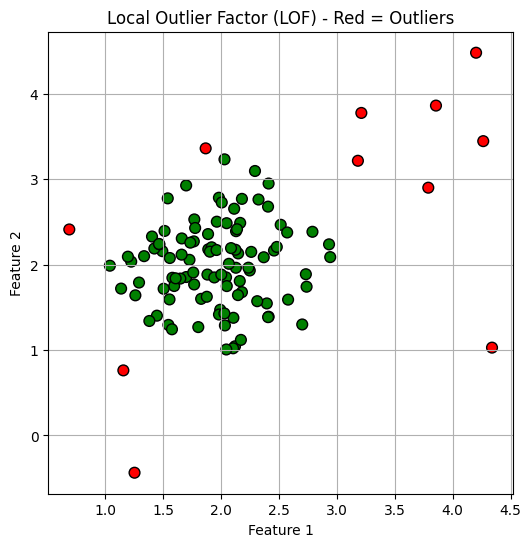

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic data
np.random.seed(42)
X_inliers = 0.5 * np.random.randn(100, 2) + [2, 2]
X_outliers = np.random.uniform(low=-1, high=5, size=(10, 2))
X = np.vstack((X_inliers, X_outliers))

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

# Visualize
plt.figure(figsize=(6, 6))
colors = ['red' if label == -1 else 'green' for label in y_pred]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=60, edgecolor='k')
plt.title("Local Outlier Factor (LOF) - Red = Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



## One-Class SVM

One-Class SVM is a machine learning model used to detect whether a new data point is similar to the normal data or an outlier.

Think of it like drawing a tight boundary around the normal data.
Anything outside that boundary is considered an anomaly.

It learns a decision boundary that encloses most of the normal data.

Points inside → normal

Points outside → outlier

It’s like SVM, but instead of separating two classes, it separates normal data from “everything else”.

You give it only normal data (one class)

It tries to find the smallest region (or margin) that encloses most of the data.

During prediction:

If a new point lies inside, it is normal

If it lies outside, it is an outlier


Using a kernel trick (like the RBF kernel), One-Class SVM maps the data to a higher-dimensional feature space.

In that higher-dimensional space:

One-Class SVM tries to find a hyperplane that best separates the data from the origin (0,0,...).

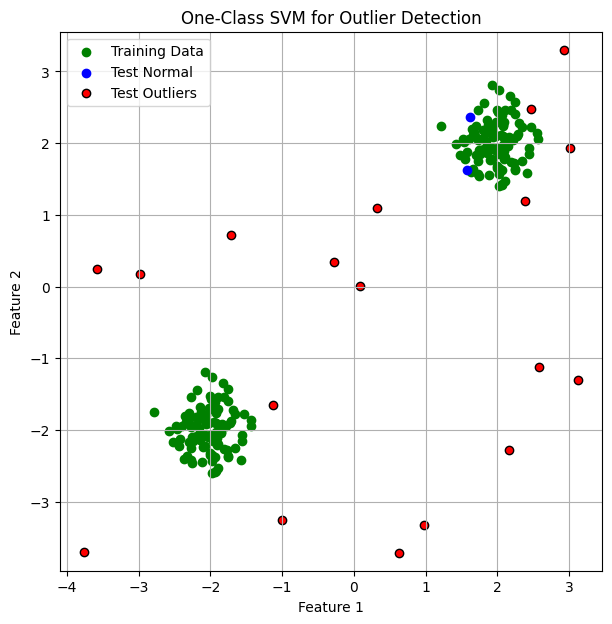

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Generate normal data (cluster)
np.random.seed(42)
X_train = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X_train + 2, X_train - 2]   # 2 clusters of normal data

# Generate some new test points (some outliers)
X_test = np.random.uniform(low=-4, high=4, size=(20, 2))

# Fit One-Class SVM
clf = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
clf.fit(X_train)

# Predict
y_pred_train = clf.predict(X_train)  # +1 = normal, -1 = outlier
y_pred_test = clf.predict(X_test)

# Plot
plt.figure(figsize=(7, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c='green', label="Training Data")
plt.scatter(X_test[y_pred_test == 1, 0], X_test[y_pred_test == 1, 1], c='blue', label="Test Normal")
plt.scatter(X_test[y_pred_test == -1, 0], X_test[y_pred_test == -1, 1], c='red', label="Test Outliers", edgecolors='k')
plt.title("One-Class SVM for Outlier Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
